In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

In [11]:
from Regressions import *

In [4]:
y_tr, X_tr, ids_tr = load_csv_data('../Data/train.csv')
y_te, X_te, ids_te = load_csv_data('../Data/test.csv')

In [5]:
y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

# Training data preparation

## Neutral data

In [43]:
X_tr_neutral = preliminary_treatment_X(X_tr, imp_method="mean")


## Logarithmic data

In [52]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

X_tr_log = preliminary_treatment_X(x_nan, imp_method="median")

## Cleaned data

In [8]:
def outlier_cleaning(data, y, features_treated = "all", m=3):
    if features_treated == "all":
        #features_treated = range(0,data.shape[1])
        features_treated = np.delete(np.arange(data.shape[1]),[22])
        
        
    data_clean = data.copy()
    y_clean = y.copy()
    
    for i in features_treated:
        feature = data_clean[:,i]
        outliers = abs(feature - np.nanmean(feature)) > m * np.nanstd(feature)
        data_clean = data_clean[~outliers,:]
        y_clean = y_clean[~outliers]
    return data_clean, y_clean

In [9]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan
y_clean = y_tr.copy()
x_clean, y_clean = outlier_cleaning(x_nan, y_clean, "all")

#transform nan back into -999
x_clean[np.isnan(x_clean)]=-999

X_tr_clean = preliminary_treatment_X(x_clean, imp_method="median")

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


## Interaction data with Feature 22

In [48]:
X_tr_inter = X_tr_neutral.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_inter = interactions(X_tr_inter,i,j)

# Testing different methods on training data

Testing for method reg_logistic_regression with transf. id([])... Be patient! ;)
[<function reg_logistic_regression at 0x10c35aea0>, 1e-06] [<function id at 0x10ab26840>, []]


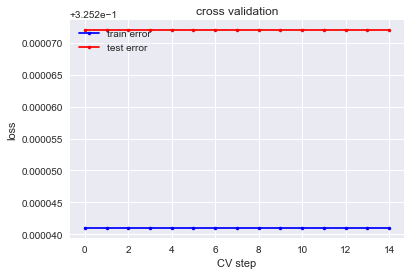

In [56]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-5,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[reg_logistic_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [54]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.237356

## Single validation

In [58]:
cross_validation(y_tr, tx, k_fold, reg_logistic_regression, gamma = 0.0005, k_indices=None, seed=1)

TypeError: cross_validation() got an unexpected keyword argument 'gamma'